# Project: Rethinking Appointments
#### By Sanjay

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### 1)Dataset : 
The dataset chosen is 'No-show appointments' dataset, which  collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
### 2)Aim :
The entire dataset includes various information on how different factors like age, gender etc., influences on whether a person would turn up on a scheduled appoinment. So our primary aim is to minimise the No-Show rate.    
### 3)Questions Investigated :
a)What is an optimum schedule-appointment gap limit to for appoinments to minimise the No-show chances?

* There are high chances that people tend to forget appoinments scheduled long before hence it is necessary to understand the influence of the gap between the Scheduling day and Appointment day so that we might take measures of reminders or setting an optimum gap limit.
* Dependent   variable : No-Show 
* Independent variable : ScheduledDay and AppointmentDay

b)How do patients(already diagnosed with diseases) show up to further medical treatment?   

* Since it is a medical appoinments report it's important that people already diagonosed with follow up they're medical  schedule to have better medical treatment and a faster ailment.
* Dependent   variable : No-Show 
* Independent variable : Hipertension, Diabetes and Alcoholism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## A)Data Wrangling
In this section, I have analysed the various aspects of the dataset to verify if it's clean and made adjustments to make it highly usable.
### 1)Preview:

In [2]:
#Loading the dataset and previewing it
df=pd.read_csv('dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Column_name Consistencey : The format followed here is without space, UpperCase initial letters
df.rename(columns={'SMS_received' : 'SmsRecieved','No-show':'NoShow'},inplace=True)

### 2)Duplicates check :

In [4]:
print("No. of duplicates is {}".format(df.duplicated().sum())) #There are no duplicates found

No. of duplicates is 0


* There are no duplicates because an unique AppointmentID is generated for each value in the dataset.

In [5]:
df.count()-df.nunique() #Differnce between count of all values and unique values AppointmentID is zero

PatientId          48783
AppointmentID          0
Gender            110525
ScheduledDay        6978
AppointmentDay    110500
Age               110423
Neighbourhood     110446
Scholarship       110525
Hipertension      110525
Diabetes          110525
Alcoholism        110525
Handcap           110522
SmsRecieved       110525
NoShow            110525
dtype: int64

* Hence, the AppoinmentsID is dropped to avoid the case of same appointments given multiple id's.

In [6]:
df.drop(columns='AppointmentID',axis=1,inplace=True) #Drop the Appointment ID column as it is an unique ID
print("No. of duplicates is {}".format(df.duplicated().sum())) #Duplicates are found

No. of duplicates is 618


* These duplicate rows are to be dropped.

In [7]:
df.drop_duplicates(keep='first',inplace=True) #drop the duplicates
print("No. of duplicates is {}".format(df.duplicated().sum()))#To verify if the duplicates are dropped

No. of duplicates is 0


### 3)Null check : 
* There are no null values in dataset.

In [8]:
df.isnull().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SmsRecieved       0
NoShow            0
dtype: int64

### 4)DataTypes Check

In [9]:
df.dtypes

PatientId         float64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SmsRecieved         int64
NoShow             object
dtype: object

* Scheduled Day and AppointmentDay are representing time but are in object(string) datatype.
* Hence they have to be converted into Datetime datatype to easily perfom operations on it.

In [10]:
#Typecasting
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df.dtypes #verification

PatientId                float64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SmsRecieved                int64
NoShow                    object
dtype: object

## 5)Final Filtering :
* Though every factor might be correlated with No-Show but there are only certain factors that help us gain insights to our questions posed. So we filter out the columns not needed to get our final clean dataset. 

In [11]:
#List of coulumn names
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SmsRecieved', 'NoShow'],
      dtype='object')

In [12]:
columns_filter=['PatientId','Gender','Age','Neighbourhood','Scholarship','Handcap','SmsRecieved']#Columns not required for our research questions.
df.drop(columns=columns_filter,axis=1,inplace=True)

In [13]:
#Final Dataset to be used
df.head()

,ScheduledDay,AppointmentDay,Hipertension,Diabetes,Alcoholism,NoShow
0,2016-04-29 18:38:08,2016-04-29,1,0,0,No
1,2016-04-29 16:08:27,2016-04-29,0,0,0,No
2,2016-04-29 16:19:04,2016-04-29,0,0,0,No
3,2016-04-29 17:29:31,2016-04-29,0,0,0,No
4,2016-04-29 16:07:23,2016-04-29,1,1,0,No


<a id='eda'></a>
## B)Exploratory Data Analysis
Analysing the data to address our inquisitive questions.  

### a)What is a optimum schedule-appointment gap limit to for appoinments to minimise the No-show chances?
   #### i)Bar Graph using pandas

* Step 1: Creating Gap column by finding the difference between AppointmentDay and ScheduledDay.

In [14]:
df['Gap']=(df['AppointmentDay']-df['ScheduledDay']).dt.days+1 #Plus 1 to make the same day as zero and not -1.
df.head(2)#verification

,ScheduledDay,AppointmentDay,Hipertension,Diabetes,Alcoholism,NoShow,Gap
0,2016-04-29 18:38:08,2016-04-29,1,0,0,No,0
1,2016-04-29 16:08:27,2016-04-29,0,0,0,No,0


* Step 2: 
   - Calculating NoShow proportions by dividing value counts of NoShow values('Yes','No') with their total count using numpy divide function. Numpy is used to speed up the calculation.
   - Plotting bar graphs for 3 ranges of gap between AppointmentDay and ScheduledDay.
    

In [15]:
#Function to plot the graph using pandas
def graph(dftemp):
    dfgraph=dftemp.plot(kind='bar');
    dfgraph.set_xlabel("NoShow")
    dfgraph.set_ylabel("Appoinments Proportion")

    a)Negative gap range:
        

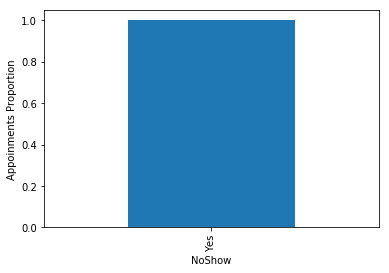

In [16]:
dfneg=np.divide(df.query('Gap  < 0')['NoShow'].value_counts(),df.query('Gap < 0')['NoShow'].count())
graph(dfneg)

    b)Zero gap range:

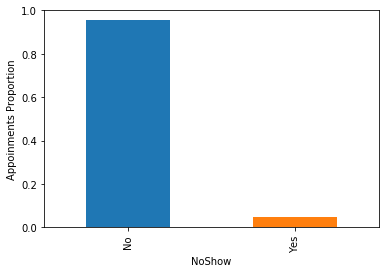

In [17]:
dfzero=np.divide(df.query('Gap  == 0')['NoShow'].value_counts(),df.query('Gap  == 0')['NoShow'].count())
graph(dfzero)

    c)Positive gap range:

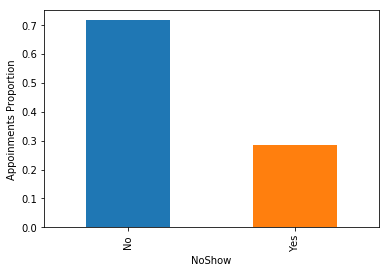

In [18]:
dfpos=np.divide(df.query('Gap>0')['NoShow'].value_counts(),df.query('Gap>0')['NoShow'].count())
graph(dfpos)

#### ii)Scatter diagram using matplotlib:

* STEP 1: Calculate NoShow ratio into a DataFrame.

In [19]:
NoShowRatio=df.query('NoShow == "Yes"').Gap.value_counts()/df.Gap.value_counts()
df1=pd.DataFrame(NoShowRatio)
df1.reset_index(level=0, inplace=True)

* STEP 2: Plot the scatter diagram with labels and title.

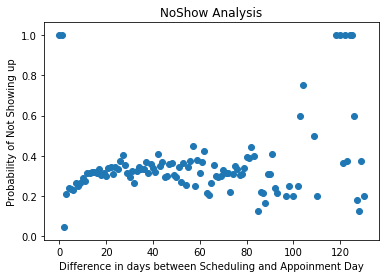

In [20]:
plt.scatter(df1.index,df1.Gap)
plt.xlabel('Difference in days between Scheduling and Appoinment Day')
plt.ylabel("Probability of Not Showing up")
plt.title('NoShow Analysis');

### b)How do patients(already diagnosed with diseases) show up to further medical treatment? 

* Step 1: Create a disease column to represent the cumulative count of Hipertension, Diabetes and Alcoholism.

In [21]:
df['Disease']=df.Hipertension + df.Diabetes + df.Alcoholism #New column to indicate the total count of diseases.
df.head()#verification

,ScheduledDay,AppointmentDay,Hipertension,Diabetes,Alcoholism,NoShow,Gap,Disease
0,2016-04-29 18:38:08,2016-04-29,1,0,0,No,0,1
1,2016-04-29 16:08:27,2016-04-29,0,0,0,No,0,0
2,2016-04-29 16:19:04,2016-04-29,0,0,0,No,0,0
3,2016-04-29 17:29:31,2016-04-29,0,0,0,No,0,0
4,2016-04-29 16:07:23,2016-04-29,1,1,0,No,0,2


* STEP 2: Calculate NoShow proportion using numpy divide into a DataFrame.

In [22]:
NoShowProportion=np.divide(df.query('NoShow == "Yes"').Disease.value_counts(),df.Disease.value_counts())
df2=pd.DataFrame(NoShowProportion)
df2.reset_index(level=0, inplace=True)

* STEP 2: Plot the line chart with labels and title.

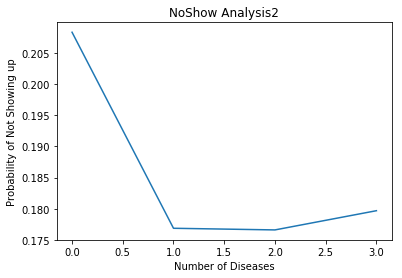

In [23]:
plt.plot(df2.index,df2.Disease)
plt.xlabel('Number of Diseases')
plt.ylabel("Probability of Not Showing up")
plt.title('NoShow Analysis2');

<a id='conclusions'></a>
## Conclusions 
### A)Research Finding 1 :
* A person  who scheduled an appoinment later than the appinment day would practically not be able to show up. These are maybe manual scheduling defects that has to be fixed.
* The appointments scheduled within 24hrs have the highest chance of turning up(approx 0.9 probability) 
* Any appointment scheduled after a week has a slightly lesser chance of turning up(approx 0.7 probabilty)
#### Thus restricting the appoinment scheduling to within a week preferably on the same day will help optimise the showing up levels.

### B)Research Finding 2:
* An already diagnosed patient has very less chance of not showing up to an appoinment compared to a healthy patient.
* With a very less probability of not showing up for diagonosed patients (apprpx 0.17), our intuition on making sure the diagnosed ones turn up was right.
#### Hence it is important to constantly remind the healthy(non-diagnosed) ones to make sure they turn up while prioritising the already diagnosed ones appoinments as they're most likely to turn up.